# Week 1 Python Capstone Project

Lets start to import all libraries and creating some functions, so the code is shorter and easier to read.

In [1]:
import PIL
from PIL import Image, ImageEnhance, ImageDraw, ImageFont

# Function to change a channel by a Factor
def changeChannel (anImage,aChannel,aFactor):
    # Split into 3 channels
    r, g, b = anImage.split()
    if aChannel == 0 :   # Change Reds
        r = r.point(lambda i: i * aFactor)
    if aChannel == 1 :   # Change Greens
        g = g.point(lambda i: i * aFactor)
    if aChannel == 2 :   # Change Blues
        b = b.point(lambda i: i * aFactor)
    # Recombine back to RGB image
    result = Image.merge('RGB', (r, g, b))
    return result

# Function to Add a Black Ribbon at the botton of a Image
def blackRibbon (anImage, aHeight):
    ribbonImage=PIL.Image.new(anImage.mode, (anImage.width,(anImage.height+aHeight)))
    ribbonImage.paste(anImage, (0,0))
    return ribbonImage                           

# Function to Add text to an Image
def textRibbon (anImage,aText, aPoint):
    d1 = ImageDraw.Draw(anImage)
    myFont = ImageFont.truetype('readonly/fanwood-webfont.ttf', 75)
    d1.text(aPoint, aText , font=myFont, fill =(255, 255, 0))



Now is time to load the image, create the list of images with the different intensities for each channel, I am appending a black ribbon at the bottom and adding the text to each image, for the text color I use Yellow which I like better over black than white. Yellow color is define as (255, 255, 0) while white is define as (255, 255, 255) and black is (0, 0, 0)

In [2]:
# Setting Black Ribbon Height, Font Size and Black Ribbon Border
borderRibbon = 10
fontSize = 75
ribHeight = fontSize + (2 * borderRibbon) 

# Loading Image
im = Image.open('readonly/msi_recruitment.gif').convert('RGB')
imageHeight = im.height
textXPos = borderRibbon
textYPos = imageHeight + borderRibbon
textXYPos = (textXPos,textYPos)

# Creating the list of Images for each Channel Factor change
images=[]
intensities = [0.1,0.5,0.9]
for channel in range(0, 3):
    for aIntensity in intensities:
        newImage1 = changeChannel (im,channel,aIntensity)
        newBlkRibImage = blackRibbon(newImage1,ribHeight)
        text = "channel "+ str(channel) + " intensity " + str(aIntensity)
        textRibbon(newBlkRibImage,text, textXYPos)
        images.append(newBlkRibImage)


Now we will buid the contact sheet using the same code that we used before 

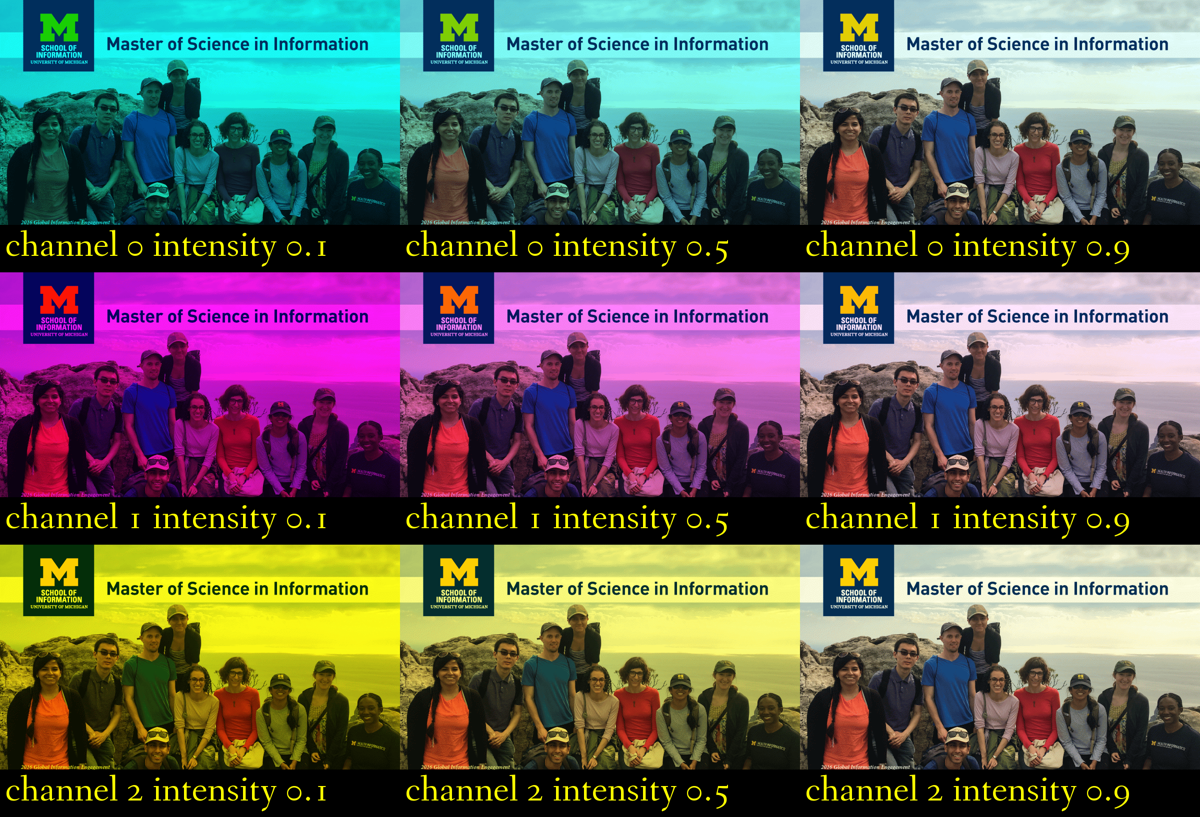

In [3]:
# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

Let's save the contact sheet for the records as a PNG image

In [4]:
contact_sheet.save("Channels_Intensities.png")